<a href="https://colab.research.google.com/github/KaniaruIvy/Compiler-Construction/blob/main/Lab_Activity_2_Compiler_Construction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1**

**Lab 2**

Group Members: 
* 118751-Amugo Tatyana
* 118465-Maccine Quincy 
* 115774-Kaniaru Ivy 
* 120190-Lusiji Lyvia 
* 120304-Owira Keith

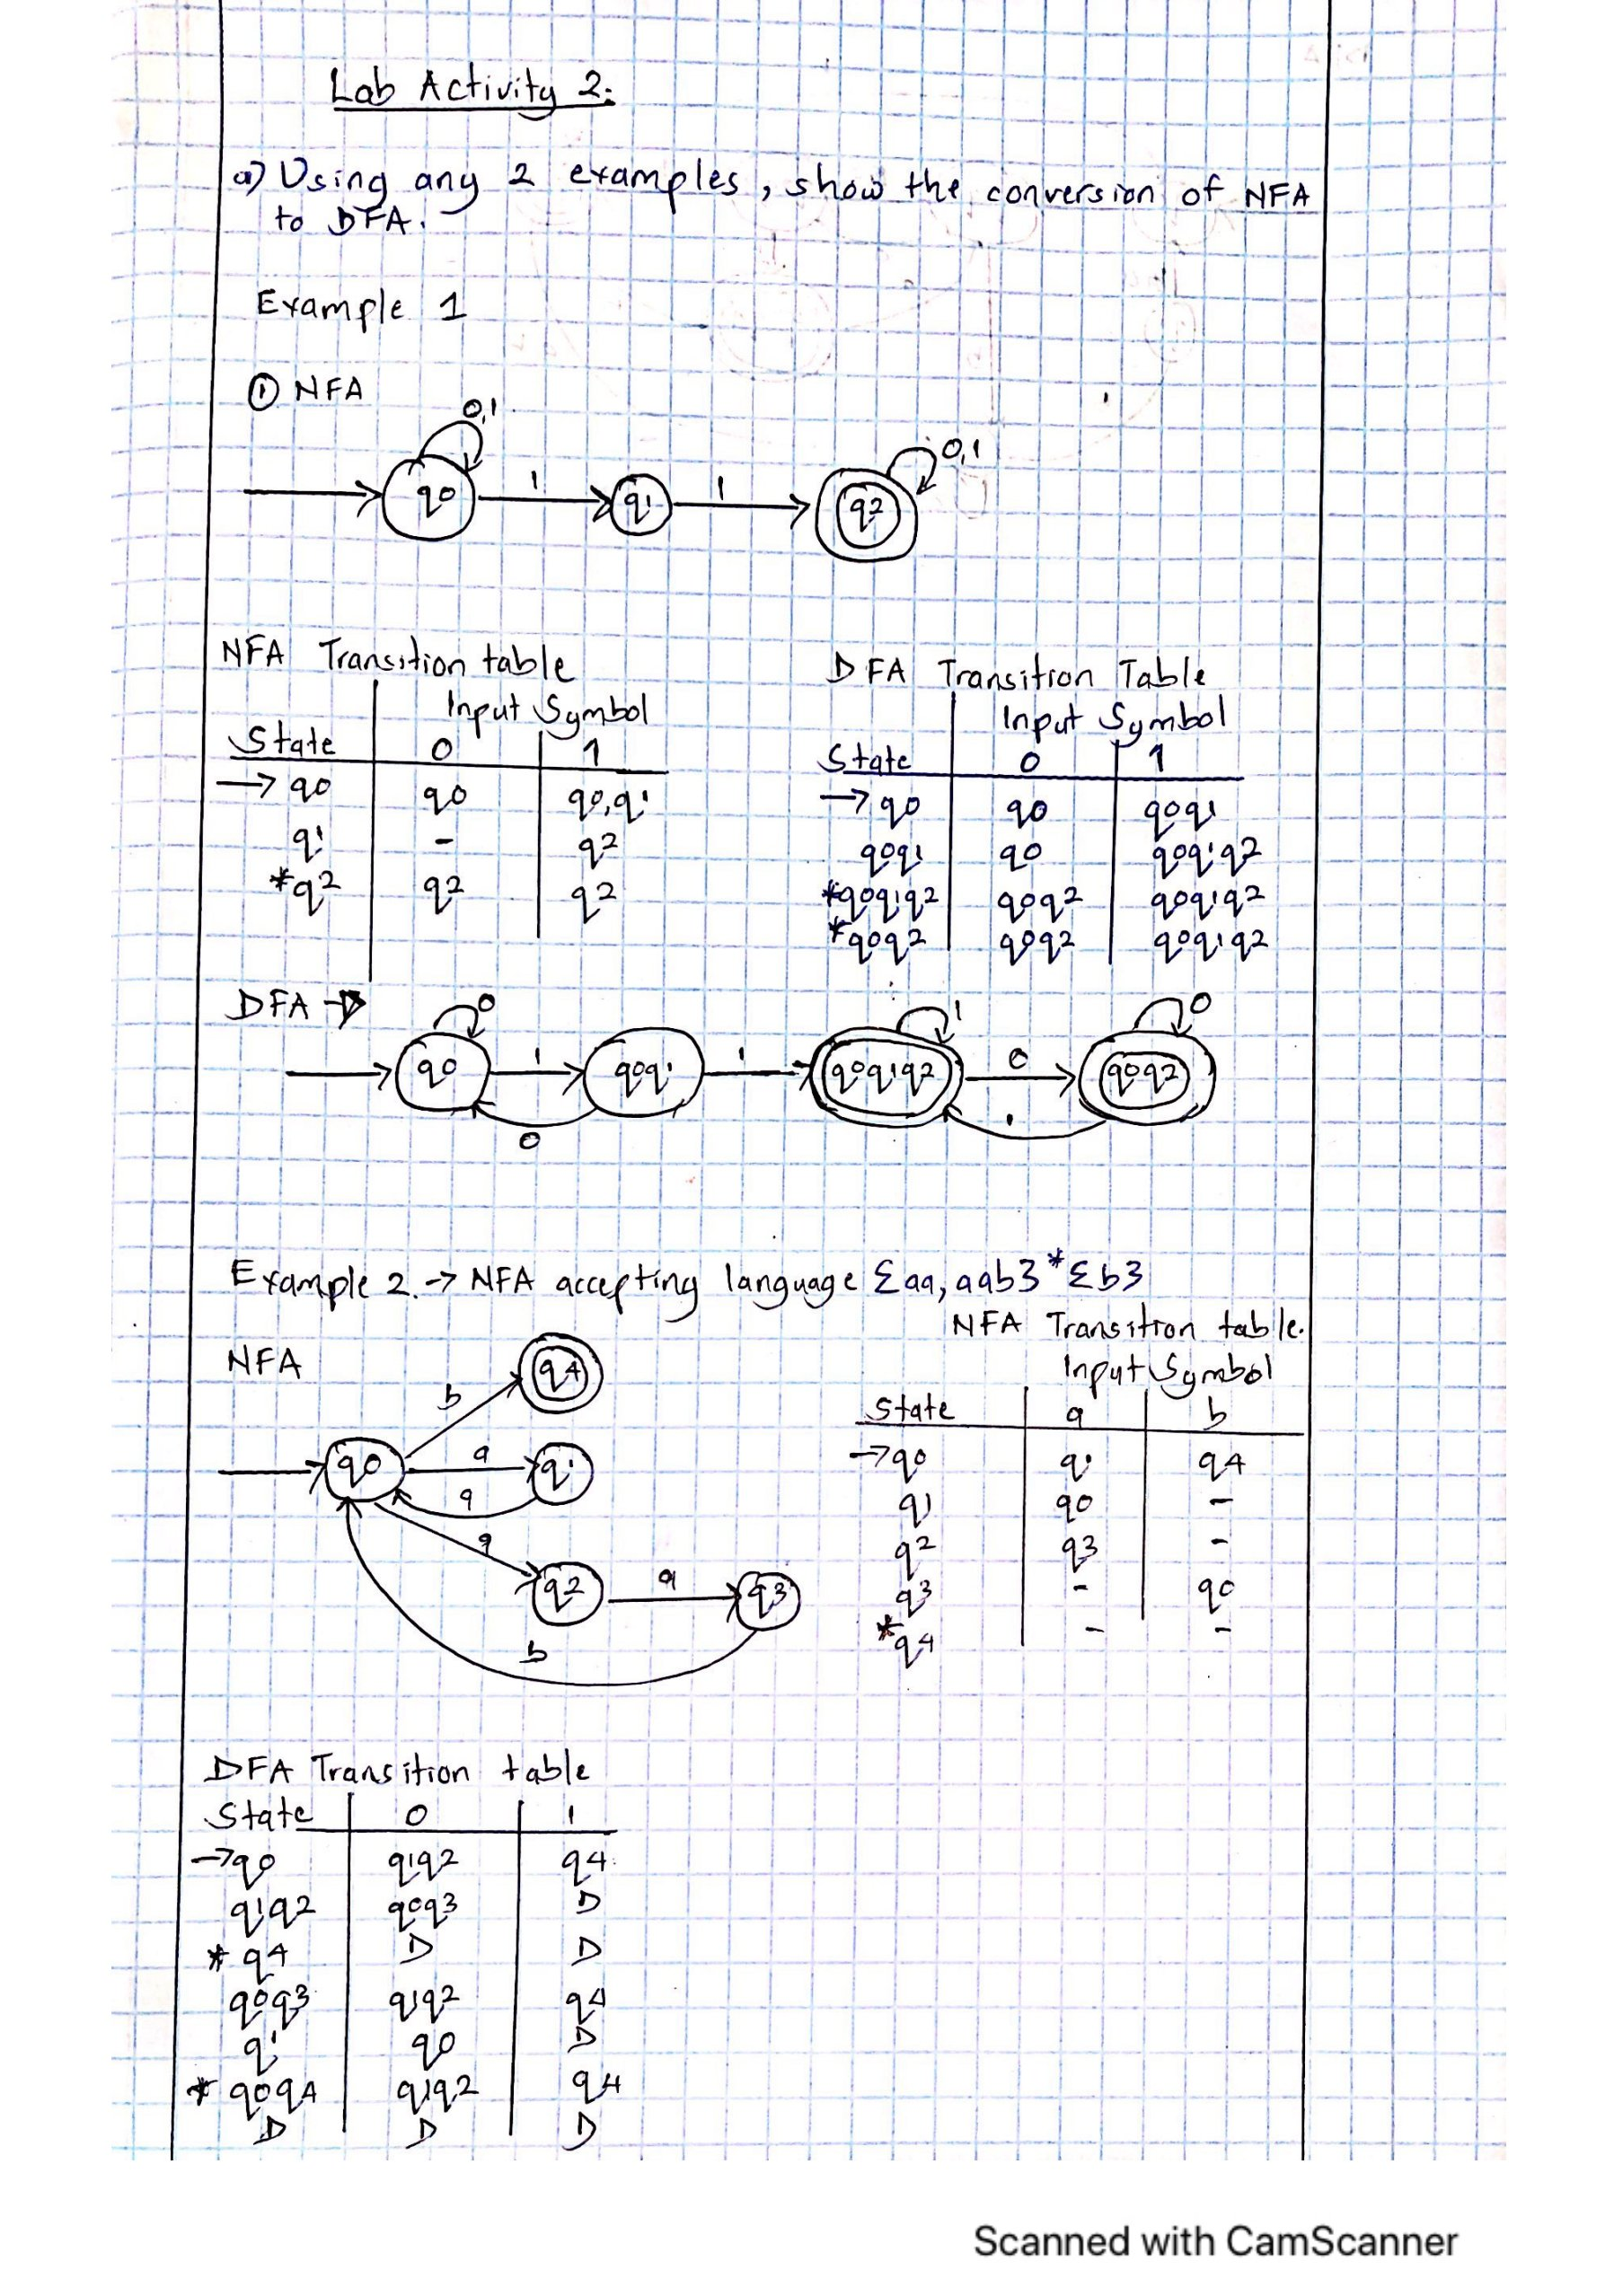

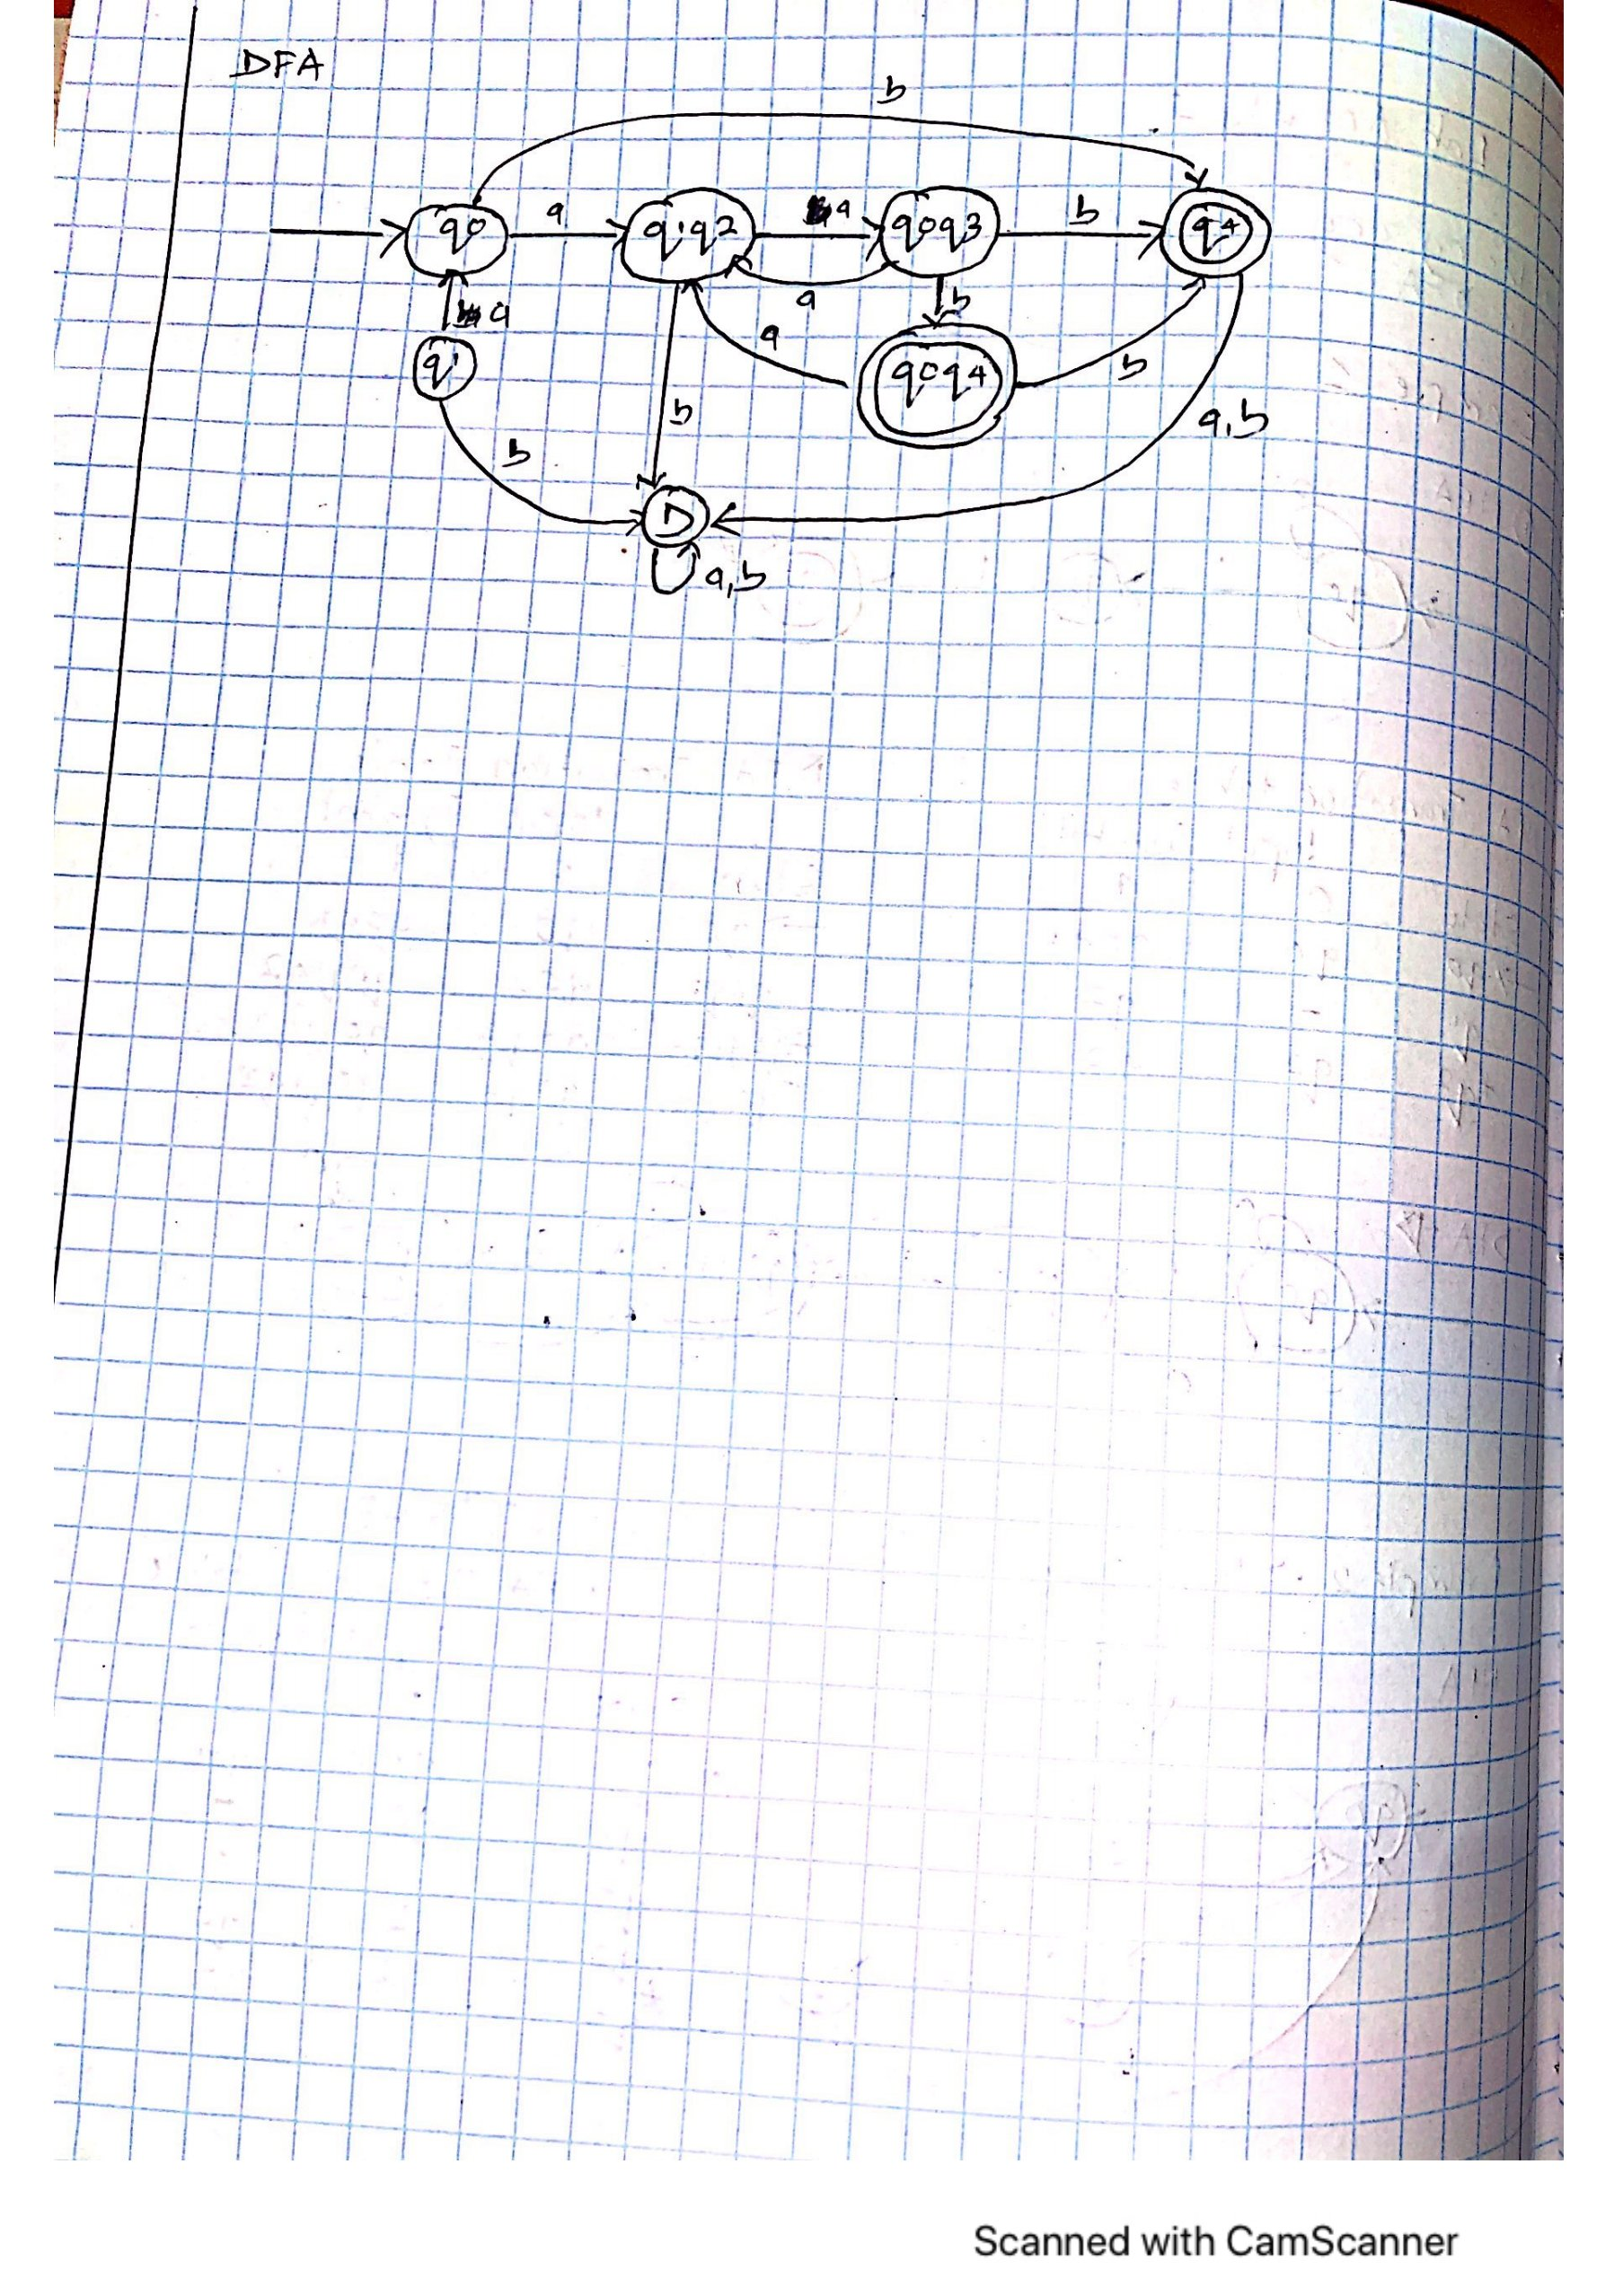

# **Question 2**

The flex calc.l

```
%option noyywrap

%{
#include <stdio.h>

#define YY_DECL int yylex()

#include "calc.tab.h"

%}

%%

[ \t]	; // ignore all whitespace
[0-9]+\.[0-9]+ 	{yylval.fval = atof(yytext); return T_FLOAT;}
[0-9]+		{yylval.ival = atoi(yytext); return T_INT;}
\n		{return T_NEWLINE;}
"+"		{return T_PLUS;}
"-"		{return T_MINUS;}
"*"		{return T_MULTIPLY;}
"/"		{return T_DIVIDE;}
"("		{return T_LEFT;}
")"		{return T_RIGHT;}
"exit"		{return T_QUIT;}
"quit"		{return T_QUIT;}

%%

```



The bison calc.y file

```
%{

#include <stdio.h>
#include <stdlib.h>

extern int yylex();
extern int yyparse();
extern FILE* yyin;

void yyerror(const char* s);
%}

%union {
	int ival;
	float fval;
}

%token<ival> T_INT
%token<fval> T_FLOAT
%token T_PLUS T_MINUS T_MULTIPLY T_DIVIDE T_LEFT T_RIGHT
%token T_NEWLINE T_QUIT
%left T_PLUS T_MINUS
%left T_MULTIPLY T_DIVIDE

%type<ival> expression
%type<fval> mixed_expression

%start calculation

%%

calculation:
	   | calculation line
;

line: T_NEWLINE
    | mixed_expression T_NEWLINE { printf("\tResult: %f\n", $1);}
    | expression T_NEWLINE { printf("\tResult: %i\n", $1); }
    | T_QUIT T_NEWLINE { printf("bye!\n"); exit(0); }
;

mixed_expression: T_FLOAT                 		 { $$ = $1; }
	  | mixed_expression T_PLUS mixed_expression	 { $$ = $1 + $3; }
	  | mixed_expression T_MINUS mixed_expression	 { $$ = $1 - $3; }
	  | mixed_expression T_MULTIPLY mixed_expression { $$ = $1 * $3; }
	  | mixed_expression T_DIVIDE mixed_expression	 { $$ = $1 / $3; }
	  | T_LEFT mixed_expression T_RIGHT		 { $$ = $2; }
	  | expression T_PLUS mixed_expression	 	 { $$ = $1 + $3; }
	  | expression T_MINUS mixed_expression	 	 { $$ = $1 - $3; }
	  | expression T_MULTIPLY mixed_expression 	 { $$ = $1 * $3; }
	  | expression T_DIVIDE mixed_expression	 { $$ = $1 / $3; }
	  | mixed_expression T_PLUS expression	 	 { $$ = $1 + $3; }
	  | mixed_expression T_MINUS expression	 	 { $$ = $1 - $3; }
	  | mixed_expression T_MULTIPLY expression 	 { $$ = $1 * $3; }
	  | mixed_expression T_DIVIDE expression	 { $$ = $1 / $3; }
	  | expression T_DIVIDE expression		 { $$ = $1 / (float)$3; }
;

expression: T_INT				{ $$ = $1; }
	  | expression T_PLUS expression	{ $$ = $1 + $3; }
	  | expression T_MINUS expression	{ $$ = $1 - $3; }
	  | expression T_MULTIPLY expression	{ $$ = $1 * $3; }
	  | T_LEFT expression T_RIGHT		{ $$ = $2; }
;

%%

int main() {
	yyin = stdin;

	do {
		yyparse();
	} while(!feof(yyin));

	return 0;
}

void yyerror(const char* s) {
	fprintf(stderr, "Parse error: %s\n", s);
	exit(1);
}

```



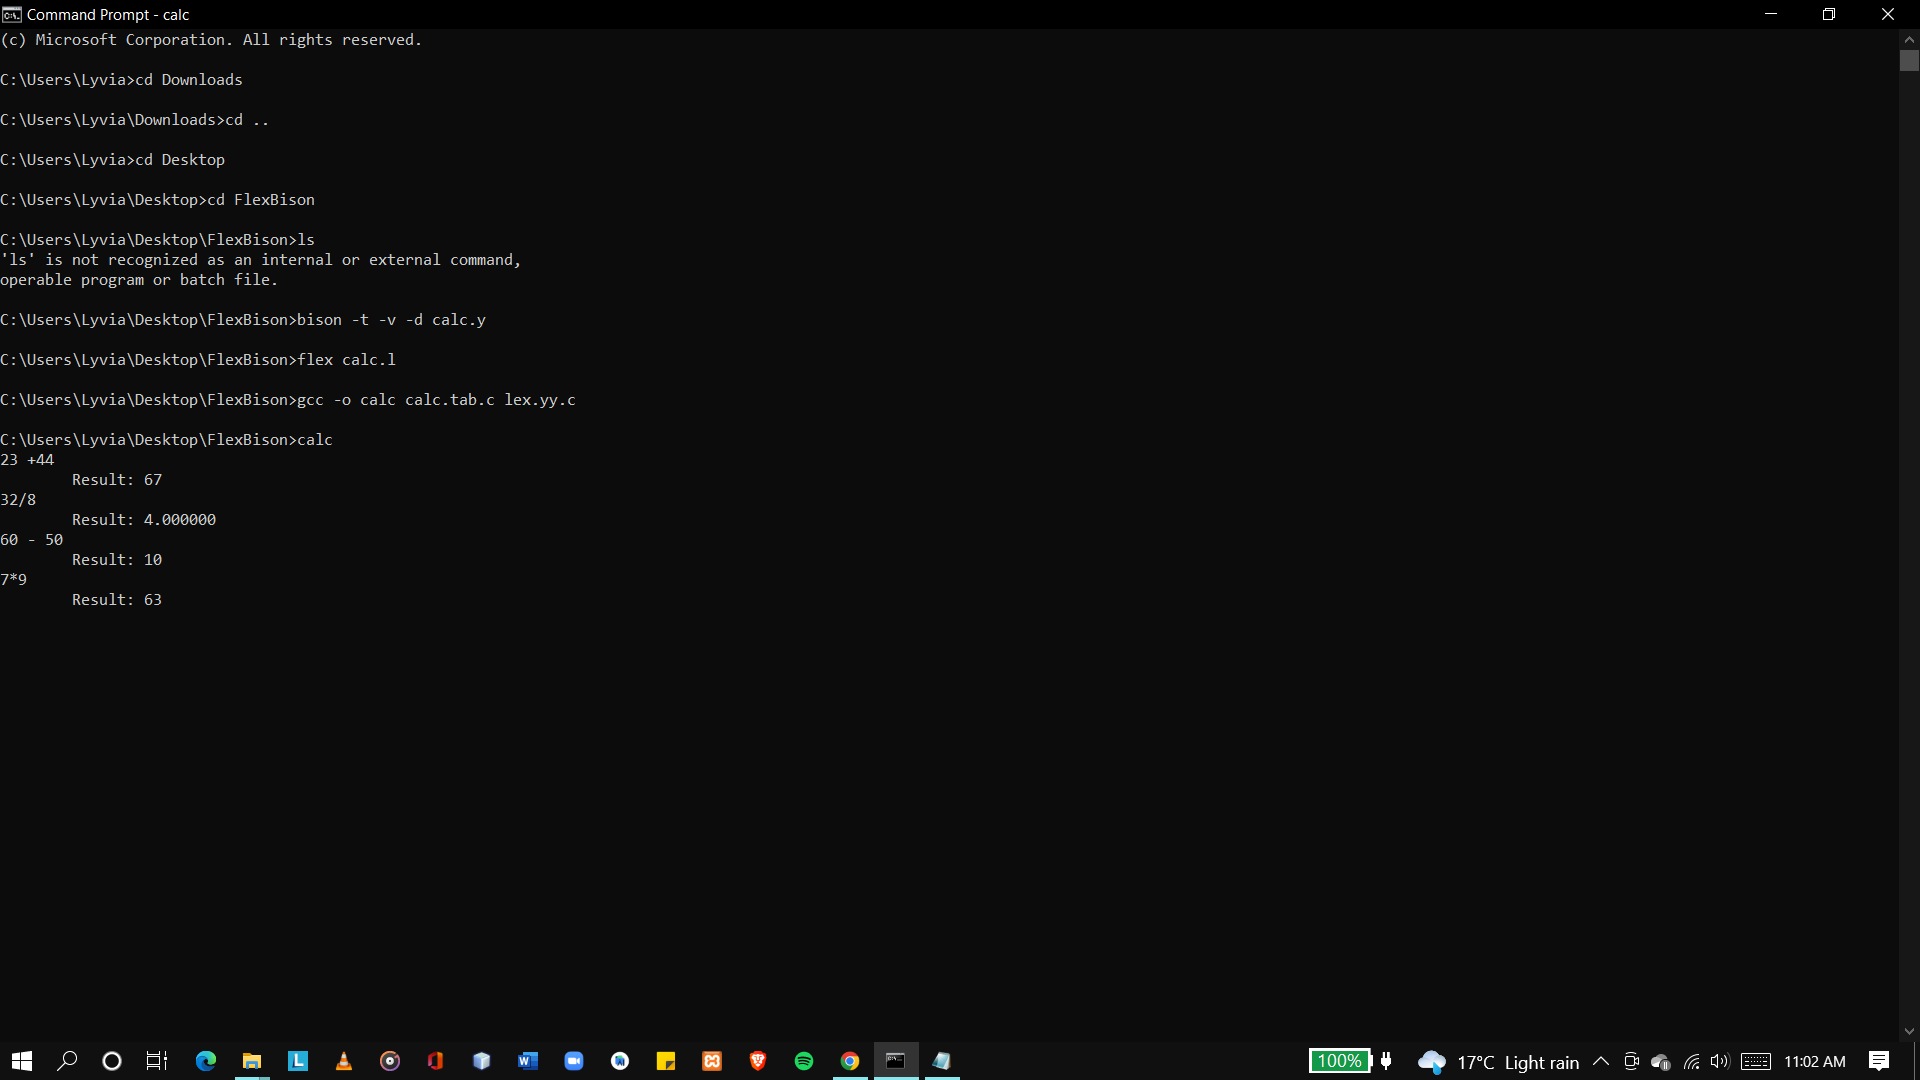